# Hybrid Classification System Analysis

This notebook analyzes the performance of our hybrid classification system that combines itemtypes database matching with vector database semantic search for gaming item classification.

## Workflow:
1. **Configuration** - Set up paths and imports
2. **Data Collection** - Load hybrid classification results 
3. **Nintendo Analysis** - Analyze Nintendo Switch specific improvements
4. **Data Export** - Export analysis data to files
5. **Report Generation** - Generate detailed analysis reports
6. **Visualization** - Create comprehensive analysis plots
7. **PDF Comparison** - Generate comparison PDFs between GDINO and SAM

In [37]:
# Configuration for hybrid classification analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import numpy as np
import json
from pathlib import Path

# Paths for our analysis
STRUSTORE_GDINO_FINAL = "../gdinoOutput/final"  # Current enhanced results
COMPARISON_OUTPUT = "./hybrid_comparison"

# Create output directory
Path(COMPARISON_OUTPUT).mkdir(parents=True, exist_ok=True)

print(f"Configuration loaded. Output directory: {COMPARISON_OUTPUT}")
print(f"Looking for data in: {STRUSTORE_GDINO_FINAL}")

# Helper function to ensure directory exists
def ensure_dir(p: Path):
    p.mkdir(parents=True, exist_ok=True)

# Helper function to load JSON files
def load_json(p):
    if not p or not Path(p).exists():
        return {}
    try:
        with open(p, 'r', encoding='utf-8') as f:
            return json.load(f)
    except:
        return {}

Configuration loaded. Output directory: ./hybrid_comparison
Looking for data in: ../gdinoOutput/final


In [38]:
# Export data for further analysis
def export_analysis_data():
    """Export the analysis data to various formats for further investigation"""
    
    # Check if df exists
    if 'df' not in globals():
        print("Error: df not defined. Please run the data collection cell first.")
        return
    
    if df.empty:
        print("No data to export")
        return
    
    # Import required modules
    import json
    from pathlib import Path
    
    # Export main dataset
    csv_path = Path(COMPARISON_OUTPUT) / "hybrid_classification_data.csv"
    df.to_csv(csv_path, index=False)
    print(f"Full dataset exported to: {csv_path}")
    
    # Export Nintendo-specific data
    if 'nintendo_df' in globals() and len(nintendo_df) > 0:
        nintendo_csv_path = Path(COMPARISON_OUTPUT) / "nintendo_switch_analysis.csv"
        nintendo_df.to_csv(nintendo_csv_path, index=False)
        print(f"Nintendo Switch data exported to: {nintendo_csv_path}")
    
    # Export Joy-Con specific data
    if 'joycon_df' in globals() and len(joycon_df) > 0:
        joycon_csv_path = Path(COMPARISON_OUTPUT) / "joycon_improvements.csv"
        joycon_df.to_csv(joycon_csv_path, index=False)
        print(f"Joy-Con improvements exported to: {joycon_csv_path}")
    
    # Export summary statistics
    summary_stats = {
        'total_detections': len(df),
        'avg_similarity': df['similarity_score'].mean(),
        'median_similarity': df['similarity_score'].median(),
        'std_similarity': df['similarity_score'].std(),
        'itemtypes_count': len(df[df['source'] == 'itemtypes']),
        'vector_db_count': len(df[df['source'] == 'vector_database']),
        'high_confidence_count': len(df[df['similarity_score'] > 0.85]),
        'nintendo_count': len(nintendo_df) if 'nintendo_df' in globals() and len(nintendo_df) > 0 else 0,
        'joycon_count': len(joycon_df) if 'joycon_df' in globals() and len(joycon_df) > 0 else 0
    }
    
    stats_path = Path(COMPARISON_OUTPUT) / "summary_statistics.json"
    with open(stats_path, 'w') as f:
        json.dump(summary_stats, f, indent=2)
    
    print(f"Summary statistics exported to: {stats_path}")
    print("\nExport completed successfully!")

# Don't run immediately - wait for data to be loaded
print("Export function defined. Run data collection cells first, then call export_analysis_data()")

Export function defined. Run data collection cells first, then call export_analysis_data()


In [39]:
# Generate detailed comparison report
def generate_comparison_report():
    """Generate a detailed comparison report"""
    
    # Check if df exists and is not empty
    if 'df' not in globals():
        print("Error: df not defined. Please run the data collection cell first.")
        return
    
    if df.empty:
        print("No data to analyze")
        return
    
    report_lines = []
    report_lines.append("# HYBRID CLASSIFICATION SYSTEM ANALYSIS REPORT")
    report_lines.append("=" * 60)
    report_lines.append(f"Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
    report_lines.append(f"Total Files Analyzed: {df['file_stem'].nunique()}")
    report_lines.append(f"Total Detections: {len(df)}")
    report_lines.append("")
    
    # Overall performance metrics
    report_lines.append("## OVERALL PERFORMANCE METRICS")
    report_lines.append("-" * 40)
    report_lines.append(f"Average Similarity Score: {df['similarity_score'].mean():.4f}")
    report_lines.append(f"Median Similarity Score: {df['similarity_score'].median():.4f}")
    report_lines.append(f"Standard Deviation: {df['similarity_score'].std():.4f}")
    report_lines.append("")
    
    # Source distribution analysis
    report_lines.append("## SOURCE DISTRIBUTION ANALYSIS")
    report_lines.append("-" * 40)
    source_counts = df['source'].value_counts()
    for source, count in source_counts.items():
        pct = count / len(df) * 100
        avg_sim = df[df['source'] == source]['similarity_score'].mean()
        report_lines.append(f"{source}: {count} detections ({pct:.1f}%) - Avg Similarity: {avg_sim:.4f}")
    report_lines.append("")
    
    # Category analysis
    report_lines.append("## TOP 10 CATEGORIES")
    report_lines.append("-" * 40)
    category_counts = df['category'].value_counts().head(10)
    for category, count in category_counts.items():
        pct = count / len(df) * 100
        report_lines.append(f"{category}: {count} detections ({pct:.1f}%)")
    report_lines.append("")
    
    # Nintendo Switch specific analysis
    nintendo_df_exists = 'nintendo_df' in globals() and len(globals().get('nintendo_df', [])) > 0
    if nintendo_df_exists:
        nintendo_df_local = globals()['nintendo_df']
        report_lines.append("## NINTENDO SWITCH ANALYSIS")
        report_lines.append("-" * 40)
        report_lines.append(f"Total Nintendo detections: {len(nintendo_df_local)}")
        report_lines.append(f"Average similarity: {nintendo_df_local['similarity_score'].mean():.4f}")
        
        # Joy-Con analysis
        joycon_df_exists = 'joycon_df' in globals() and len(globals().get('joycon_df', [])) > 0
        if joycon_df_exists:
            joycon_df_local = globals()['joycon_df']
            report_lines.append(f"Joy-Con detections: {len(joycon_df_local)}")
            report_lines.append(f"Joy-Con average similarity: {joycon_df_local['similarity_score'].mean():.4f}")
            
            # Show key improvements
            report_lines.append("")
            report_lines.append("### KEY JOY-CON IMPROVEMENTS:")
            for idx, row in joycon_df_local.head(5).iterrows():
                report_lines.append(f"- {row['file_stem']}: '{row['original_classification']}' -> '{row['readable_display']}'")
        report_lines.append("")
    
    # Brand analysis
    report_lines.append("## TOP 10 BRANDS")
    report_lines.append("-" * 40)
    brand_counts = df['brand'].value_counts().head(10)
    for brand, count in brand_counts.items():
        if pd.notna(brand) and brand != '':
            pct = count / len(df) * 100
            report_lines.append(f"{brand}: {count} detections ({pct:.1f}%)")
    report_lines.append("")
    
    # Quality analysis
    report_lines.append("## QUALITY DISTRIBUTION")
    report_lines.append("-" * 40)
    high_conf = len(df[df['similarity_score'] > 0.85])
    med_conf = len(df[(df['similarity_score'] >= 0.5) & (df['similarity_score'] <= 0.85)])
    low_conf = len(df[df['similarity_score'] < 0.5])
    
    report_lines.append(f"High Confidence (>0.85): {high_conf} ({high_conf/len(df)*100:.1f}%)")
    report_lines.append(f"Medium Confidence (0.5-0.85): {med_conf} ({med_conf/len(df)*100:.1f}%)")
    report_lines.append(f"Low Confidence (<0.5): {low_conf} ({low_conf/len(df)*100:.1f}%)")
    report_lines.append("")
    
    # Dual matching analysis
    dual_matches = df[(df['vector_reference_id'] != '') & (df['itemtypes_name'] != '')].copy()
    if len(dual_matches) > 0:
        report_lines.append("## DUAL MATCHING ANALYSIS")
        report_lines.append("-" * 40)
        report_lines.append(f"Detections with both itemtypes and vector matches: {len(dual_matches)}")
        report_lines.append(f"Average primary similarity: {dual_matches['similarity_score'].mean():.4f}")
        report_lines.append(f"Average secondary similarity: {dual_matches['vector_reference_similarity'].mean():.4f}")
        report_lines.append("")
    
    # Write report to file
    report_text = "\n".join(report_lines)
    report_path = Path(COMPARISON_OUTPUT) / "hybrid_analysis_report.txt"
    with open(report_path, 'w', encoding='utf-8') as f:
        f.write(report_text)
    
    print(f"Report saved to: {report_path}")
    print("\n" + report_text)

# Don't run automatically - wait for data to be loaded
print("Report generation function defined. Run after data collection is complete.")

Report generation function defined. Run after data collection is complete.


In [40]:
# Generate comprehensive analysis visualizations
def generate_analysis_plots():
    """Generate comprehensive analysis visualizations"""
    
    # Check if df exists and is not empty
    if 'df' not in globals():
        print("Error: df not defined. Please run the data collection cell first.")
        return
        
    if df.empty:
        print("No data to analyze")
        return
    
    # Set up the plotting style
    plt.style.use('default')
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Source Distribution
    ax1 = plt.subplot(2, 3, 1)
    source_counts = df['source'].value_counts()
    colors = ['#2E8B57', '#4682B4', '#DAA520']  # Green, Blue, Gold
    wedges, texts, autotexts = ax1.pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%', colors=colors[:len(source_counts)])
    ax1.set_title('Classification Source Distribution', fontsize=14, fontweight='bold')
    
    # 2. Similarity Score Distribution
    ax2 = plt.subplot(2, 3, 2)
    df['similarity_score'].hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.set_xlabel('Similarity Score')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Similarity Score Distribution', fontsize=14, fontweight='bold')
    ax2.axvline(df['similarity_score'].mean(), color='red', linestyle='--', label=f'Mean: {df["similarity_score"].mean():.3f}')
    ax2.legend()
    
    # 3. Category Distribution (Top 10)
    ax3 = plt.subplot(2, 3, 3)
    category_counts = df['category'].value_counts().head(10)
    category_counts.plot(kind='barh', ax=ax3, color='lightcoral')
    ax3.set_xlabel('Count')
    ax3.set_title('Top 10 Categories', fontsize=14, fontweight='bold')
    
    # 4. Similarity by Source
    ax4 = plt.subplot(2, 3, 4)
    df.boxplot(column='similarity_score', by='source', ax=ax4)
    ax4.set_xlabel('Source')
    ax4.set_ylabel('Similarity Score')
    ax4.set_title('Similarity Score by Source', fontsize=14, fontweight='bold')
    plt.suptitle('')  # Remove default title
    
    # 5. Brand Distribution (Top 10)
    ax5 = plt.subplot(2, 3, 5)
    brand_counts = df['brand'].value_counts().head(10)
    if len(brand_counts) > 0:
        brand_counts.plot(kind='bar', ax=ax5, color='lightgreen', rot=45)
        ax5.set_xlabel('Brand')
        ax5.set_ylabel('Count')
        ax5.set_title('Top 10 Brands', fontsize=14, fontweight='bold')
    
    # 6. Nintendo Switch Specific Analysis
    ax6 = plt.subplot(2, 3, 6)
    # Check if nintendo_df exists in globals
    if 'nintendo_df' in globals() and len(globals().get('nintendo_df', [])) > 0:
        nintendo_df_local = globals()['nintendo_df']
        nintendo_categories = nintendo_df_local['category'].value_counts()
        nintendo_categories.plot(kind='pie', ax=ax6, autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
        ax6.set_title('Nintendo Switch Categories', fontsize=14, fontweight='bold')
        ax6.set_ylabel('')
    else:
        ax6.text(0.5, 0.5, 'No Nintendo Switch Data', ha='center', va='center', transform=ax6.transAxes)
        ax6.set_title('Nintendo Switch Categories', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f'{COMPARISON_OUTPUT}/hybrid_classification_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Generate detailed statistics
    print(f"\n=== COMPREHENSIVE STATISTICS ===")
    print(f"Total detections analyzed: {len(df)}")
    print(f"Average similarity score: {df['similarity_score'].mean():.4f}")
    print(f"Median similarity score: {df['similarity_score'].median():.4f}")
    print(f"Standard deviation: {df['similarity_score'].std():.4f}")
    
    print(f"\n=== HIGH CONFIDENCE CLASSIFICATIONS (>0.85) ===")
    high_conf = df[df['similarity_score'] > 0.85]
    print(f"Count: {len(high_conf)} ({len(high_conf)/len(df)*100:.1f}%)")
    
    print(f"\n=== MODERATE CONFIDENCE CLASSIFICATIONS (0.5-0.85) ===")
    med_conf = df[(df['similarity_score'] >= 0.5) & (df['similarity_score'] <= 0.85)]
    print(f"Count: {len(med_conf)} ({len(med_conf)/len(df)*100:.1f}%)")
    
    print(f"\n=== LOW CONFIDENCE CLASSIFICATIONS (<0.5) ===")
    low_conf = df[df['similarity_score'] < 0.5]
    print(f"Count: {len(low_conf)} ({len(low_conf)/len(df)*100:.1f}%)")

# Don't run automatically - wait for data to be loaded
print("Analysis plots function defined. Run after data collection is complete.")

Analysis plots function defined. Run after data collection is complete.


In [41]:
# Analyze Nintendo Switch Joy-Con classification improvements
def analyze_nintendo_switch_improvements():
    """Analyze the specific Nintendo Switch Joy-Con classification improvements"""
    
    # Check if df exists and is not empty
    if 'df' not in globals():
        print("Error: df not defined. Please run the data collection cell first.")
        return None, None
        
    if df.empty:
        print("No data to analyze")
        return None, None
    
    # Filter for Nintendo Switch related items
    nintendo_mask = (
        df['brand'].str.contains('Nintendo', case=False, na=False) |
        df['itemtypes_name'].str.contains('Nintendo Switch', case=False, na=False) |
        df['reference_name'].str.contains('Nintendo|Switch', case=False, na=False) |
        df['original_classification'].str.contains('Nintendo|Switch', case=False, na=False)
    )
    
    nintendo_df = df[nintendo_mask].copy()
    
    print(f"\\n=== NINTENDO SWITCH ANALYSIS ===")
    print(f"Total Nintendo Switch related detections: {len(nintendo_df)}")
    
    # Look for Joy-Con specific improvements
    joycon_mask = (
        nintendo_df['itemtypes_name'].str.contains('Joy-Con', case=False, na=False) |
        nintendo_df['original_classification'].str.contains('Joy|Con', case=False, na=False)
    )
    
    joycon_df = nintendo_df[joycon_mask].copy()
    
    print(f"Joy-Con related detections: {len(joycon_df)}")
    
    if len(joycon_df) > 0:
        print(f"\\n=== JOY-CON CLASSIFICATION IMPROVEMENTS ===")
        
        # Show before/after examples
        for idx, row in joycon_df.head(10).iterrows():
            print(f"\\nFile: {row['file_stem']} (Detection {row['detection_id']})")
            print(f"  BEFORE: {row['original_classification']}")
            print(f"  AFTER:  {row['readable_display']}")
            print(f"  Source: {row['source']} | Similarity: {row['similarity_score']:.4f}")
            if row['reference_name'] and row['itemtypes_name']:
                print(f"  Reference: {row['reference_name']} -> ItemTypes: {row['itemtypes_name']}")
    
    # Category distribution for Nintendo items
    print(f"\\n=== NINTENDO CATEGORY DISTRIBUTION ===")
    category_dist = nintendo_df['category'].value_counts()
    print(category_dist)
    
    # Source distribution for Nintendo items
    print(f"\\n=== NINTENDO SOURCE DISTRIBUTION ===")
    source_dist = nintendo_df['source'].value_counts()
    print(source_dist)
    
    return nintendo_df, joycon_df

# Don't run automatically - wait for data to be loaded
print("Nintendo Switch analysis function defined. Run after data collection is complete.")

Nintendo Switch analysis function defined. Run after data collection is complete.


=== RUNNING COMPLETE HYBRID CLASSIFICATION ANALYSIS ===

✅ Data loaded: 703 detections from 206 files

🔍 Running Nintendo Switch analysis...
\n=== NINTENDO SWITCH ANALYSIS ===
Total Nintendo Switch related detections: 581
Joy-Con related detections: 421
\n=== JOY-CON CLASSIFICATION IMPROVEMENTS ===
\nFile: c1186222082 (Detection 1)
  BEFORE: Nintendo Game Boy Color Console
  AFTER:  Nintendo DSi (DSi)
  Source: itemtypes | Similarity: 0.8716
  Reference: DSi -> ItemTypes: Nintendo DSi
\nFile: r1172860507 (Detection 1)
  BEFORE: Nintendo DS Lite Console
  AFTER:  Nintendo DSi (DS Lite Boxed)
  Source: vector_database | Similarity: 0.8638
  Reference: DS Lite Boxed -> ItemTypes: Nintendo DSi
\nFile: x1190805798 (Detection 1)
  BEFORE: Nintendo DS Original Console
  AFTER:  Nintendo DS (2DS)
  Source: vector_database | Similarity: 0.8468
  Reference: 2DS -> ItemTypes: Nintendo DS
\nFile: x1190805798 (Detection 2)
  BEFORE: Nintendo DS Lite Console
  AFTER:  Nintendo DSi (DS Lite Boxed)
  

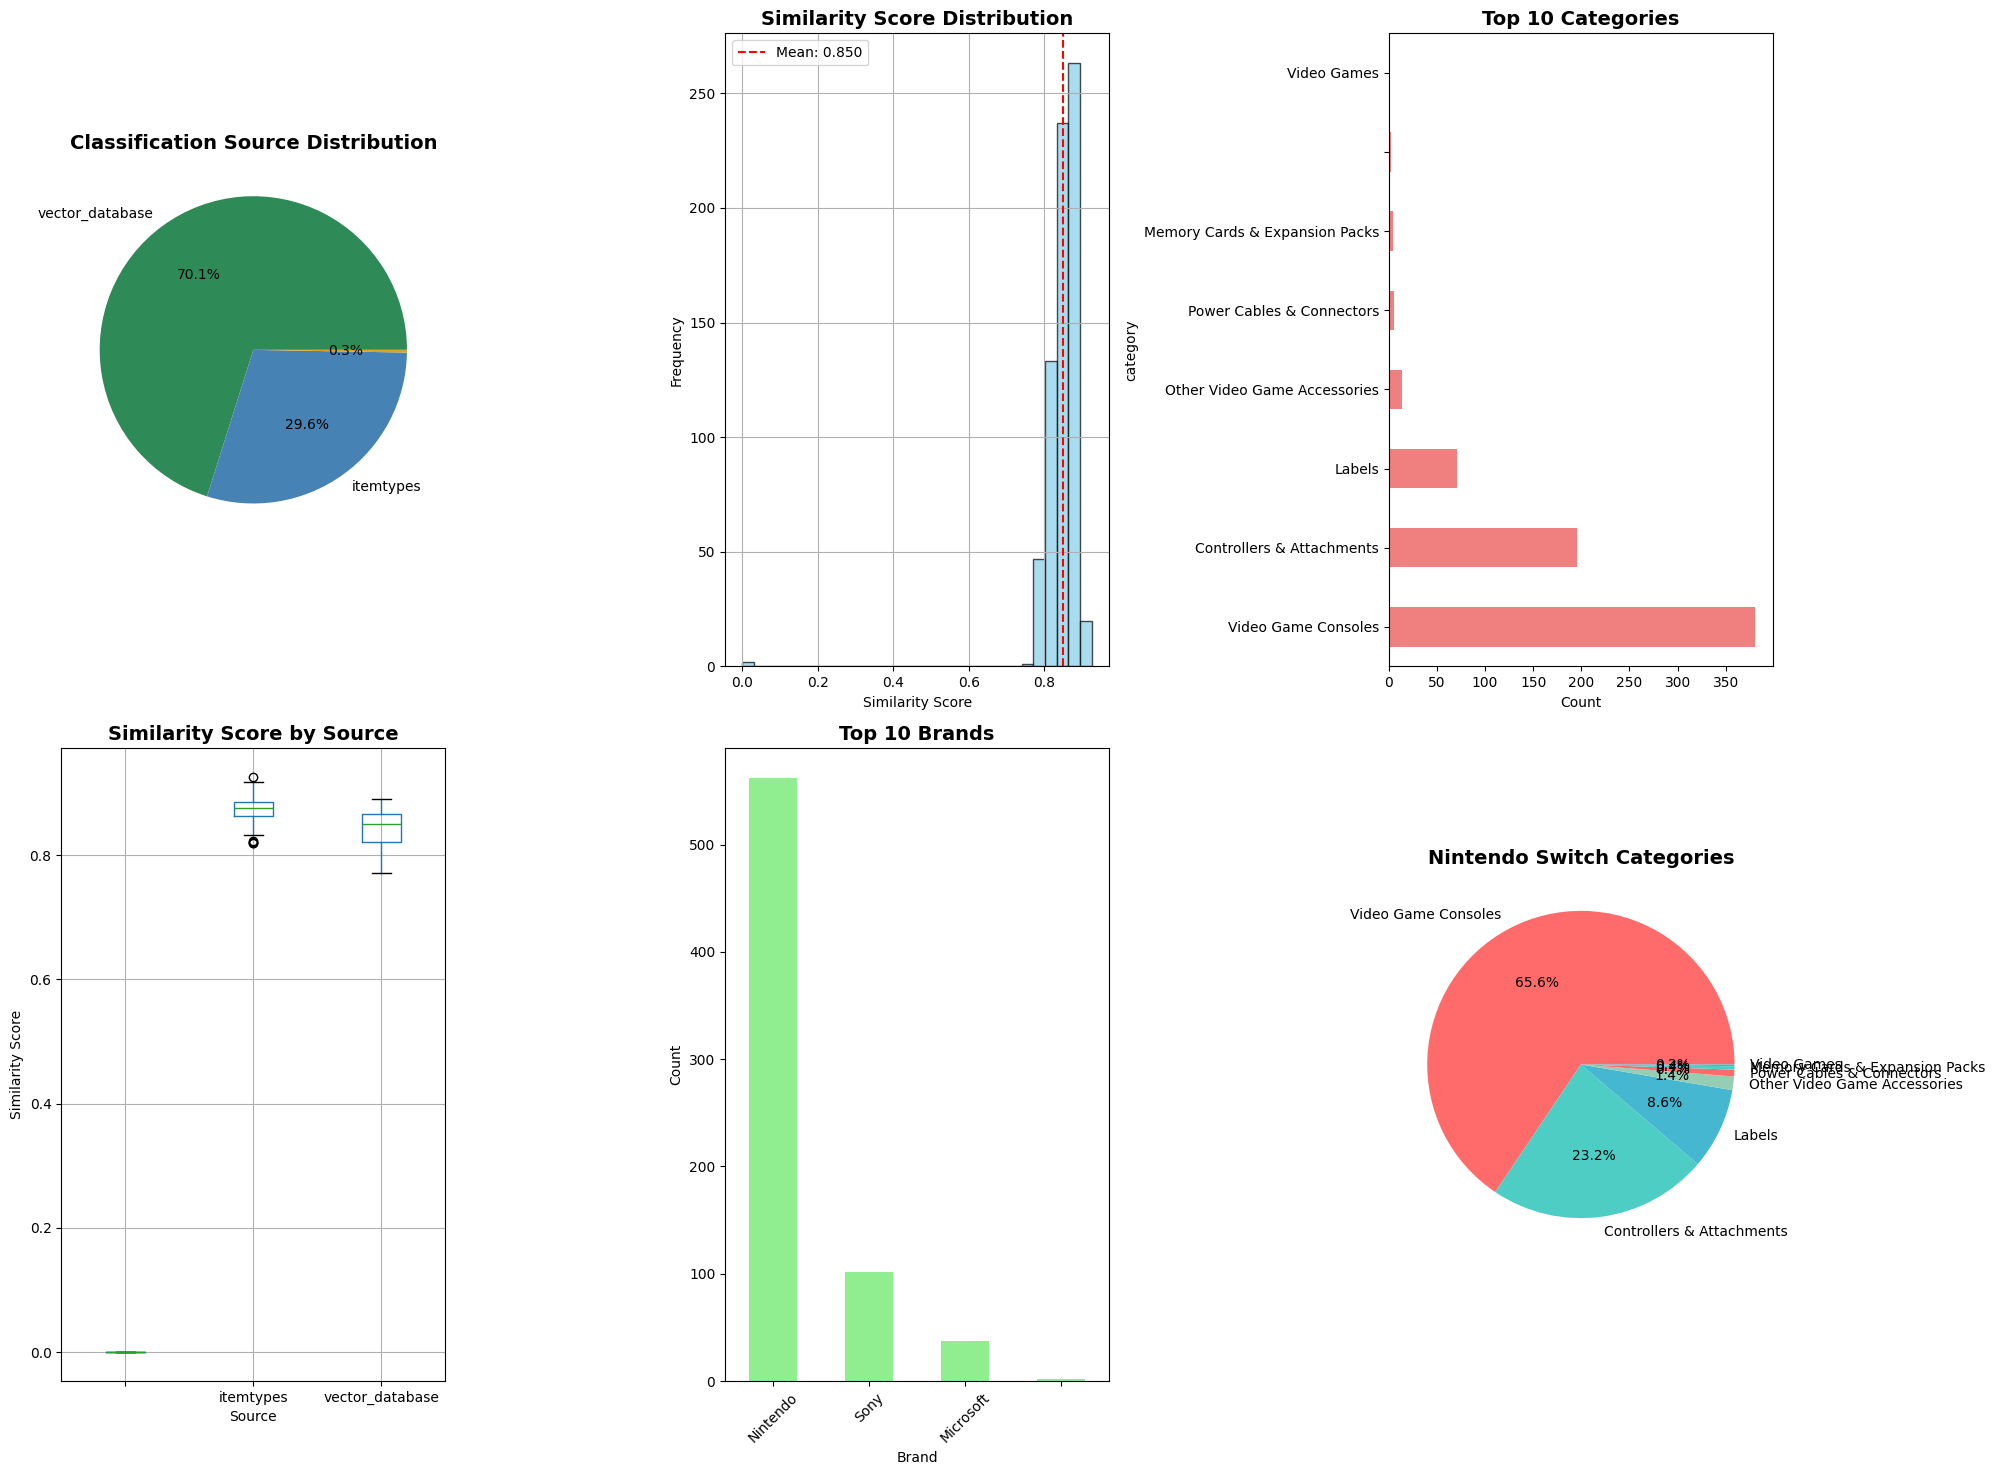


=== COMPREHENSIVE STATISTICS ===
Total detections analyzed: 703
Average similarity score: 0.8501
Median similarity score: 0.8597
Standard deviation: 0.0538

=== HIGH CONFIDENCE CLASSIFICATIONS (>0.85) ===
Count: 436 (62.0%)

=== MODERATE CONFIDENCE CLASSIFICATIONS (0.5-0.85) ===
Count: 265 (37.7%)

=== LOW CONFIDENCE CLASSIFICATIONS (<0.5) ===
Count: 2 (0.3%)

💾 Exporting analysis data...
Full dataset exported to: hybrid_comparison/hybrid_classification_data.csv
Nintendo Switch data exported to: hybrid_comparison/nintendo_switch_analysis.csv
Joy-Con improvements exported to: hybrid_comparison/joycon_improvements.csv
Summary statistics exported to: hybrid_comparison/summary_statistics.json

Export completed successfully!

✅ Analysis complete! Check the hybrid_comparison folder for outputs.


In [42]:
# Run the complete hybrid classification analysis
print("=== RUNNING COMPLETE HYBRID CLASSIFICATION ANALYSIS ===\n")

# Step 1: Check if data is loaded
if 'df' not in globals() or df.empty:
    print("Data not loaded. Please run the data collection cell first.")
else:
    print(f"✅ Data loaded: {len(df)} detections from {df['file_stem'].nunique()} files")
    
    # Step 2: Run Nintendo Switch analysis
    print("\n🔍 Running Nintendo Switch analysis...")
    nintendo_df, joycon_df = analyze_nintendo_switch_improvements()
    
    # Step 3: Generate comprehensive report
    print("\n📊 Generating comprehensive report...")
    generate_comparison_report()
    
    # Step 4: Generate analysis plots
    print("\n📈 Generating analysis visualizations...")
    generate_analysis_plots()
    
    # Step 5: Export data
    print("\n💾 Exporting analysis data...")
    export_analysis_data()
    
    print("\n✅ Analysis complete! Check the hybrid_comparison folder for outputs.")

# Make variables globally available for other cells
if 'nintendo_df' in locals():
    globals()['nintendo_df'] = nintendo_df
if 'joycon_df' in locals():
    globals()['joycon_df'] = joycon_df

In [33]:
import os
from pathlib import Path

def collect_hybrid_analysis_data():
    """Collect data for hybrid classification analysis"""
    
    strustore_path = Path(STRUSTORE_GDINO_FINAL)
    analysis_data = []
    
    print(f"Scanning {strustore_path} for JSON files...")
    
    # Walk through all subdirectories and collect JSON files
    for json_file in strustore_path.rglob("*.json"):
        try:
            data = load_json(json_file)
            if not data:
                continue
                
            # Extract file info
            relative_path = json_file.relative_to(strustore_path)
            folder_name = relative_path.parent.name
            file_stem = json_file.stem
            
            # Process each detection in the file
            gdino_improved = data.get('gdino_improved', {})
            gdino_readable = data.get('gdino_improved_readable', {})
            similarity_scores = data.get('gdino_similarity_scores', {})
            gdino_original = data.get('gdino_readable', {})  # Original GDINO classifications
            
            for detection_id in gdino_improved.keys():
                if isinstance(gdino_improved[detection_id], dict):
                    # New enhanced format
                    improved_data = gdino_improved[detection_id]
                    
                    record = {
                        'file_path': str(json_file),
                        'folder': folder_name,
                        'file_stem': file_stem,
                        'detection_id': detection_id,
                        
                        # Original data
                        'original_classification': gdino_original.get(detection_id, ''),
                        
                        # New hybrid data
                        'hybrid_id': improved_data.get('id', ''),
                        'reference_name': improved_data.get('reference_name', ''),
                        'itemtypes_name': improved_data.get('itemtypes_name', ''),
                        'category': improved_data.get('category', ''),
                        'model': improved_data.get('model', ''),
                        'brand': improved_data.get('brand', ''),
                        'source': improved_data.get('source', ''),
                        'similarity_score': improved_data.get('similarity_score', 0),
                        'readable_display': gdino_readable.get(detection_id, ''),
                        
                        # Additional metadata
                        'vector_reference_id': improved_data.get('vector_reference_id', ''),
                        'vector_reference_similarity': improved_data.get('vector_reference_similarity', 0),
                        'itemtypes_similarity': improved_data.get('itemtypes_similarity', 0),
                    }
                    
                    analysis_data.append(record)
                    
        except Exception as e:
            print(f"Error processing {json_file}: {e}")
            continue
    
    print(f"Collected {len(analysis_data)} detection records")
    return analysis_data

# Collect the data
print("Starting data collection...")
hybrid_data = collect_hybrid_analysis_data()
df = pd.DataFrame(hybrid_data)

print(f"\nDataFrame shape: {df.shape}")
if not df.empty:
    print(f"Columns: {list(df.columns)}")
    print(f"\nSource distribution:")
    print(df['source'].value_counts())
else:
    print("No data collected - check paths and file structure")

Starting data collection...
Scanning ../gdinoOutput/final for JSON files...
Collected 703 detection records

DataFrame shape: (703, 17)
Columns: ['file_path', 'folder', 'file_stem', 'detection_id', 'original_classification', 'hybrid_id', 'reference_name', 'itemtypes_name', 'category', 'model', 'brand', 'source', 'similarity_score', 'readable_display', 'vector_reference_id', 'vector_reference_similarity', 'itemtypes_similarity']

Source distribution:
source
vector_database    493
itemtypes          208
                     2
Name: count, dtype: int64


## Hybrid Classification System Analysis - Before vs After Enhancement

This section analyzes the improvement from the original vector database classifications to our new hybrid system (itemtypes + vector database).

In [34]:
TEXT_PROMPT_CSV = "../zm_scraper/items-prompt.csv"
GDINO_IMG = "../zm_scraper/auctions/gdino/output"
GDINO_FINAL = "../zm_scraper/auctions/gdino/final"
SAM_IMG = "../zm_scraper/auctions/sam/postprocessed/images"
SAM_FINAL = "../zm_scraper/auctions/sam/final"
COMPILED= "./compiled"

## Create comparison pdfs between GDINO and SAM

In [15]:
from pathlib import Path
from typing import Dict, List, Optional, Tuple
import csv, json
from PIL import Image
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4, landscape
from reportlab.lib.units import mm
from reportlab.lib.utils import ImageReader

WRITE_PER_ID_PDFS = True
COMBINED_PDF_NAME = "combined.pdf"

# Page layout
PAGE_W, PAGE_H = landscape(A4)
MARGIN         = 15 * mm
GAP_COL        = 10 * mm
HEADER_GAP     = 6 * mm
TEXT_IMG_GAP   = 4 * mm
SECTION_GAP    = 8 * mm

# Fonts
FONT_REG  = "Helvetica"
FONT_BOLD = "Helvetica-Bold"
SIZE_TITLE   = 14
SIZE_SUB     = 11
SIZE_TEXT    = 9

VALID_IMG_EXT = {".jpg", ".jpeg", ".png", ".webp"}

# --- HELPERS ---
def ensure_dir(p: Path):
    p.mkdir(parents=True, exist_ok=True)

def read_ids_from_csv(csv_path: Path) -> List[str]:
    with csv_path.open("r", encoding="utf-8") as f:
        rows = list(csv.reader(f))
    if not rows:
        return []
    headers = [h.strip().lower() for h in rows[0]]
    body = rows[1:] if headers else rows
    candidates = ["id", "item_id", "listing_id", "sku"]
    if headers:
        id_col = next((headers.index(c) for c in candidates if c in headers), 0)
    else:
        id_col = 0
    ids = [r[id_col].strip() for r in body if r and len(r) > id_col and r[id_col].strip()]
    seen, out = set(), []
    for _id in ids:
        if _id not in seen:
            seen.add(_id)
            out.append(_id)
    return out

def collect_images(folder: Path) -> Dict[str, Path]:
    out = {}
    if folder.exists():
        for p in folder.iterdir():
            if p.suffix.lower() in VALID_IMG_EXT:
                out[p.stem] = p
    return out

def collect_json(folder: Path) -> Dict[str, Path]:
    out = {}
    if folder.exists():
        for p in folder.iterdir():
            if p.suffix.lower() == ".json":
                out[p.stem] = p
    return out

def load_json(p: Optional[Path]) -> dict:
    if not p or not p.exists():
        return {}
    try:
        return json.loads(p.read_text(encoding="utf-8"))
    except:
        return {}

def fit_image_box(img_path: Path, max_w: float, max_h: float) -> Tuple[float, float]:
    with Image.open(img_path) as im:
        w, h = im.size
    scale = min(max_w / w, max_h / h) if w > 0 and h > 0 else 1.0
    return (w * scale, h * scale)

def wrap_text(c: canvas.Canvas, text: str, max_width: float, font_name: str, font_size: int) -> List[str]:
    c.setFont(font_name, font_size)
    lines = []
    for para in (text or "").split("\n"):
        words = para.split()
        if not words:
            lines.append("")
            continue
        cur = words[0]
        for w in words[1:]:
            test = f"{cur} {w}"
            if c.stringWidth(test, font_name, font_size) <= max_width:
                cur = test
            else:
                lines.append(cur)
                cur = w
        lines.append(cur)
    return lines

def draw_block(c: canvas.Canvas, text: str, x: float, y_top: float, max_width: float,
               font_name: str = FONT_REG, font_size: int = SIZE_TEXT, leading: float = None) -> float:
    if leading is None:
        leading = font_size * 1.2
    lines = wrap_text(c, text, max_width, font_name, font_size)
    c.setFont(font_name, font_size)
    y = y_top
    for ln in lines:
        c.drawString(x, y, ln)
        y -= leading
    return y

def dict_to_lines(d: dict) -> str:
    if not isinstance(d, dict) or not d:
        return "—"
    keys = sorted(d.keys(), key=lambda k: (len(str(k)), str(k)))
    return "\n".join(f"{k}: {d.get(k, '')}" for k in keys)

# --- PAGE RENDERING ---
def render_listing_page(c: canvas.Canvas,
                        item_id: str, stem: str,
                        gdino_img: Optional[Path], sam_img: Optional[Path],
                        gdino_json: dict, sam_json: dict):
    c.setFont(FONT_BOLD, SIZE_TITLE)
    x = MARGIN
    y = PAGE_H - MARGIN
    c.drawString(x, y, f"Item {item_id} — Auction {stem}")
    y -= (SIZE_TITLE * 1.4)

    c.setFont(FONT_REG, SIZE_SUB)
    c.drawString(x, y, "Left: GDINO • Right: SAM")
    y -= (SIZE_SUB * 1.6)

    col_w = (PAGE_W - 2*MARGIN - GAP_COL) / 2
    col_left_x  = MARGIN
    col_right_x = MARGIN + col_w + GAP_COL

    # text blocks
    c.setFont(FONT_BOLD, SIZE_SUB)
    y_text_top = y - (SIZE_SUB * 1.2)

    y_left_bottom  = draw_block(c, dict_to_lines(gdino_json.get("gdino_readable", {})),
                                col_left_x,  y_text_top, col_w, FONT_REG, SIZE_TEXT)
    y_right_bottom = draw_block(c, dict_to_lines(sam_json.get("sam_readable", {})),
                                col_right_x, y_text_top, col_w, FONT_REG, SIZE_TEXT)
    y_after_text = min(y_left_bottom, y_right_bottom) - TEXT_IMG_GAP

    img_max_h = y_after_text - MARGIN - SECTION_GAP

    # images
    if gdino_img and gdino_img.exists():
        w, h = fit_image_box(gdino_img, col_w, img_max_h)
        c.drawImage(ImageReader(str(gdino_img)), col_left_x, y_after_text - h,
                    width=w, height=h, preserveAspectRatio=True, anchor='sw')
        link_text = f"http://127.0.0.1:8888/edit/zm_scraper/listing/gdino/final/{item_id}/{stem}.json"
        c.setFont(FONT_REG, SIZE_TEXT)
        c.drawString(col_left_x, (y_after_text - h) - SIZE_TEXT - 2, link_text)

    else:
        c.drawString(col_left_x, y_after_text - SIZE_TEXT, "No GDINO image")

    if sam_img and sam_img.exists():
        w, h = fit_image_box(sam_img, col_w, img_max_h)
        c.drawImage(ImageReader(str(sam_img)), col_right_x, y_after_text - h,
                    width=w, height=h, preserveAspectRatio=True, anchor='sw')
        link_text = f"http://127.0.0.1:8888/edit/zm_scraper/listing/sam/final/{item_id}/{stem}.json"
        c.setFont(FONT_REG, SIZE_TEXT)
        c.drawString(col_right_x, (y_after_text - h) - SIZE_TEXT - 2, link_text)

    else:
        c.drawString(col_right_x, y_after_text - SIZE_TEXT, "No SAM image")

    c.showPage()

# --- MAIN LOOP ---
compiled_root = Path(COMPILED)
ensure_dir(compiled_root)

ids = read_ids_from_csv(Path(TEXT_PROMPT_CSV))
print(f"Found {len(ids)} IDs from CSV")

all_pages_data = []
for item_id in ids:
    gdino_jsons = collect_json(Path(GDINO_FINAL) / item_id)  # BASELINE
    if not gdino_jsons:
        print(f"[skip] {item_id}: no GDINO_FINAL JSONs found")
        continue

    gdino_imgs = collect_images(Path(GDINO_IMG) / item_id)
    sam_imgs   = collect_images(Path(SAM_IMG) / item_id)
    sam_jsons  = collect_json(Path(SAM_FINAL) / item_id)

    pages_data = []
    for stem, gj_path in gdino_jsons.items():
        gj = load_json(gj_path)
        sj = load_json(sam_jsons.get(stem))
        gi = gdino_imgs.get(stem)
        si = sam_imgs.get(stem)
        pages_data.append((stem, gj, sj, gi, si))

    # per-ID PDF
    if WRITE_PER_ID_PDFS:
        c = canvas.Canvas(str(compiled_root / f"{item_id}.pdf"), pagesize=landscape(A4))
        for stem, gj, sj, gi, si in pages_data:
            render_listing_page(c, item_id, stem, gi, si, gj, sj)
        c.save()
        print(f"Wrote {compiled_root / f'{item_id}.pdf'} ({len(pages_data)} pages)")

    all_pages_data.append((item_id, pages_data))

# combined PDF
if all_pages_data:
    c = canvas.Canvas(str(compiled_root / COMBINED_PDF_NAME), pagesize=landscape(A4))
    for item_id, pages_data in all_pages_data:
        for stem, gj, sj, gi, si in pages_data:
            render_listing_page(c, item_id, stem, gi, si, gj, sj)
    c.save()
    print(f"Wrote {compiled_root / COMBINED_PDF_NAME}")
else:
    print("No pages to combine.")


Found 5 IDs from CSV
Wrote compiled/1.pdf (60 pages)
Wrote compiled/2.pdf (24 pages)
Wrote compiled/3.pdf (36 pages)
Wrote compiled/4.pdf (30 pages)
Wrote compiled/5.pdf (56 pages)
Wrote compiled/combined.pdf
